### Task - 3: Exploratory Data Analysis - Retail

#### Objective :- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ .As a business manager, try to find out the weak areas where you can work to make more profit. 

### Author: Pooja Rao

In [46]:
# importing libraries and dataframe 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [8]:
# checking null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
df.duplicated().sum() #checking count for duplicate values

0

### Analyzing Data

To identify the weak areas where the business can work to make more profit, we can analyze the 'SampleSuperstore' dataset using the following steps:

Analyze the overall profit and loss of the business.

Identify the areas where the business is incurring losses or has low profits.

In [34]:
# overall profit and loss of the business

profit_loss = df['Profit'].sum()

print("Overall profit/loss of the business: $", profit_loss)

Overall profit/loss of the business: $ 286397.0217


### Visualize Profit/Loss By Category

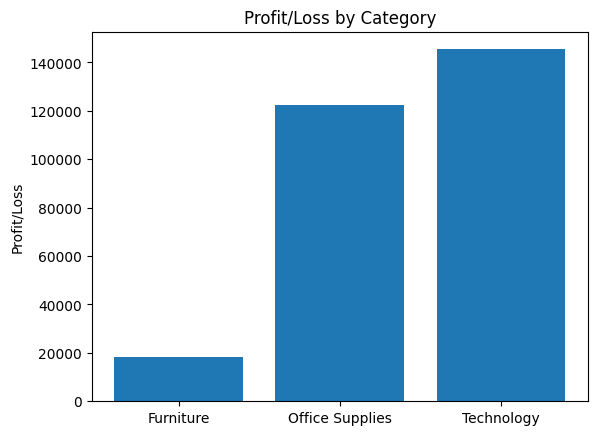

In [37]:
category_profit_loss = df.groupby('Category')['Profit'].sum()


plt.bar(category_profit_loss.index, category_profit_loss.values)
plt.title("Profit/Loss by Category")
plt.ylabel("Profit/Loss")
plt.show()

We can see that the 'Technology' category has the highest profit and the 'Furniture' category has the lowest profit.

### Visualize Profit/Loss By Region

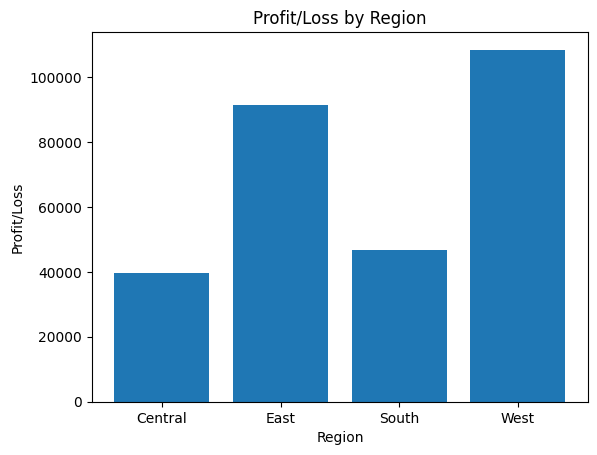

In [39]:
region_profit_loss = df.groupby('Region')['Profit'].sum()

plt.bar(region_profit_loss.index, region_profit_loss.values)
plt.title("Profit/Loss by Region")
plt.xlabel("Region")
plt.ylabel("Profit/Loss")
plt.show()

### Visualize Profit/Loss By Sub-Category

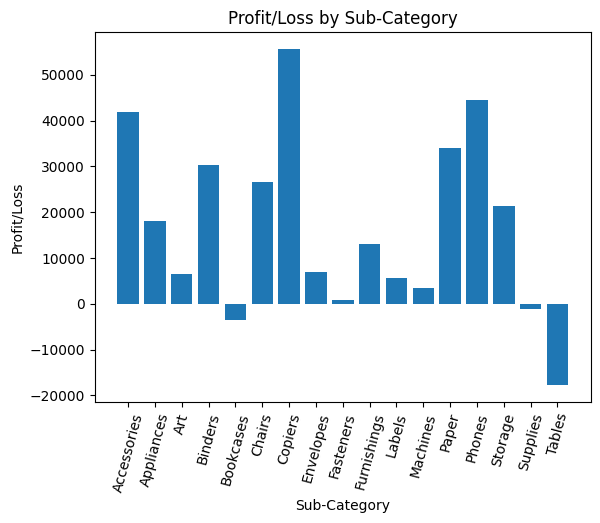

In [45]:
subCategory_profit_loss = df.groupby('Sub-Category')['Profit'].sum()

plt.bar(subCategory_profit_loss.index, subCategory_profit_loss.values)
plt.title("Profit/Loss by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit/Loss")
plt.xticks(rotation = 75)
plt.show()

### Visualizing Sales by Category

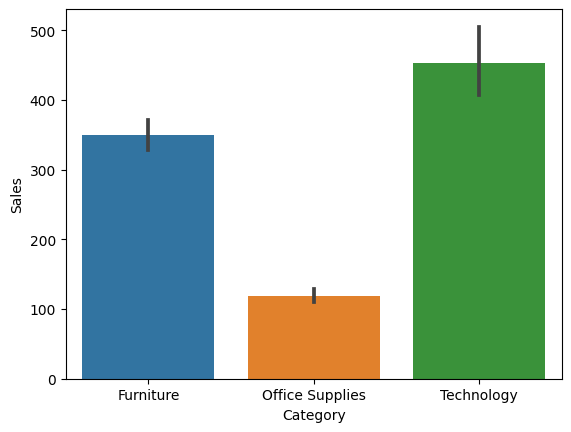

In [50]:
sns.barplot(data = df, x = 'Category', y = 'Sales')
plt.show()

### Visualizing Sales by Region

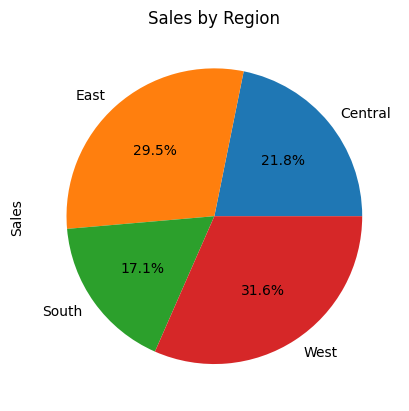

In [57]:
region_sales = df.groupby('Region')['Sales'].sum()
# plt.pie(region_sales.values, labels=region_sales.index,autopct='%1.1f%%')
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Region')
plt.show()

### Visualizing Profit/Loss By Discount

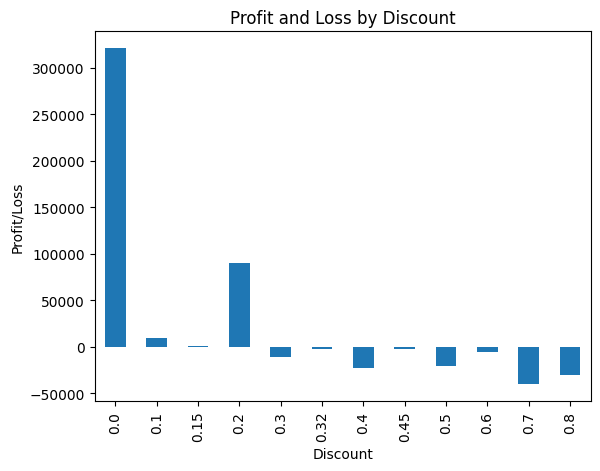

In [55]:
discount_profit_loss = df.groupby('Discount')['Profit'].sum()
discount_profit_loss.plot(kind='bar')
plt.title('Profit and Loss by Discount')
plt.xlabel('Discount')
plt.ylabel('Profit/Loss')
plt.show()

Here, the chart is showing that the profit decreases with the increase in discount.

### Visualizing Sales and Profit by Ship Mode

With this visual we can identify the most profitable Ship mode, which can inform decisions on logistics and shipping strategies.

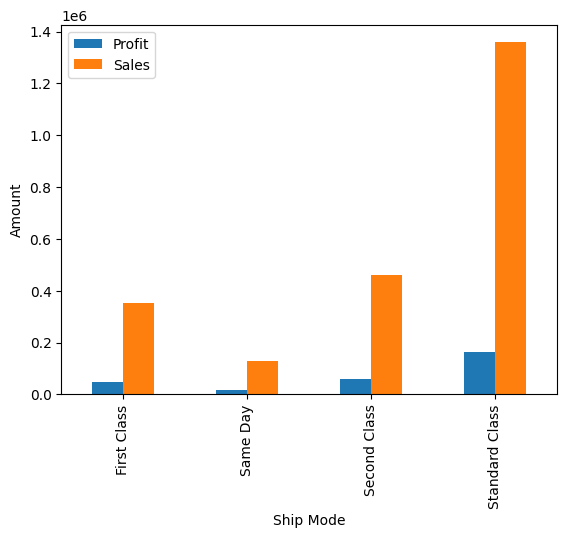

In [60]:
ship_mode_sales_profit = df.groupby('Ship Mode')[['Profit', 'Sales']].sum()
ship_mode_sales_profit.plot(kind='bar')
plt.xlabel('Ship Mode')
plt.ylabel('Amount')
plt.show()

### Visualizing Sales and Profit by State

This graph can help identify which states are driving the most revenue and profitability, and can help inform decisions on sales and marketing strategies for different regions.

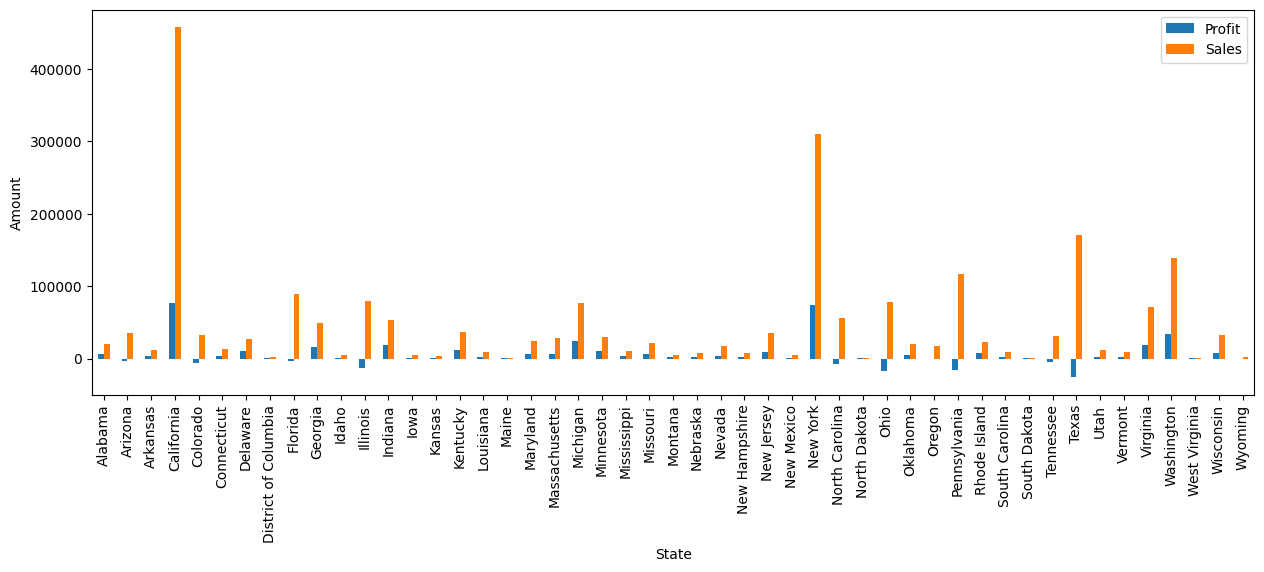

In [66]:
state_sales_profit = df.groupby('State')[['Profit', 'Sales']].sum()
state_sales_profit.plot(kind='bar', figsize=(15,5))
plt.xlabel('State')
plt.ylabel('Amount')
plt.show()

Recommendations- 
- Offer discounts strategically, focusing on products with high margins and avoiding over-discounting low-margin products. 
- Implement customer retention strategies, such as loyalty programs and personalized marketing, to increase repeat purchases and improve customer lifetime value.

Conclusion- This is a very simple Exploratory Data Analysis I performed.